# Step1:Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

# Step2:Importing Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
can = load_breast_cancer()

In [4]:
can
#in target (0 indicates malignant and 1 indicates benign)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
can.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print(can['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
print(can['target_names'])

['malignant' 'benign']


In [8]:
print(can['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
print(can['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print(can['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [11]:
can['data'].shape

(569, 30)

In [12]:
cdf = pd.DataFrame(np.c_[can['data'],can['target']],columns = np.append(can['feature_names'],'target'))

In [13]:
cdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0.0


In [14]:
cdf.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
cdf.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# Step3:Visualizing The Dataset

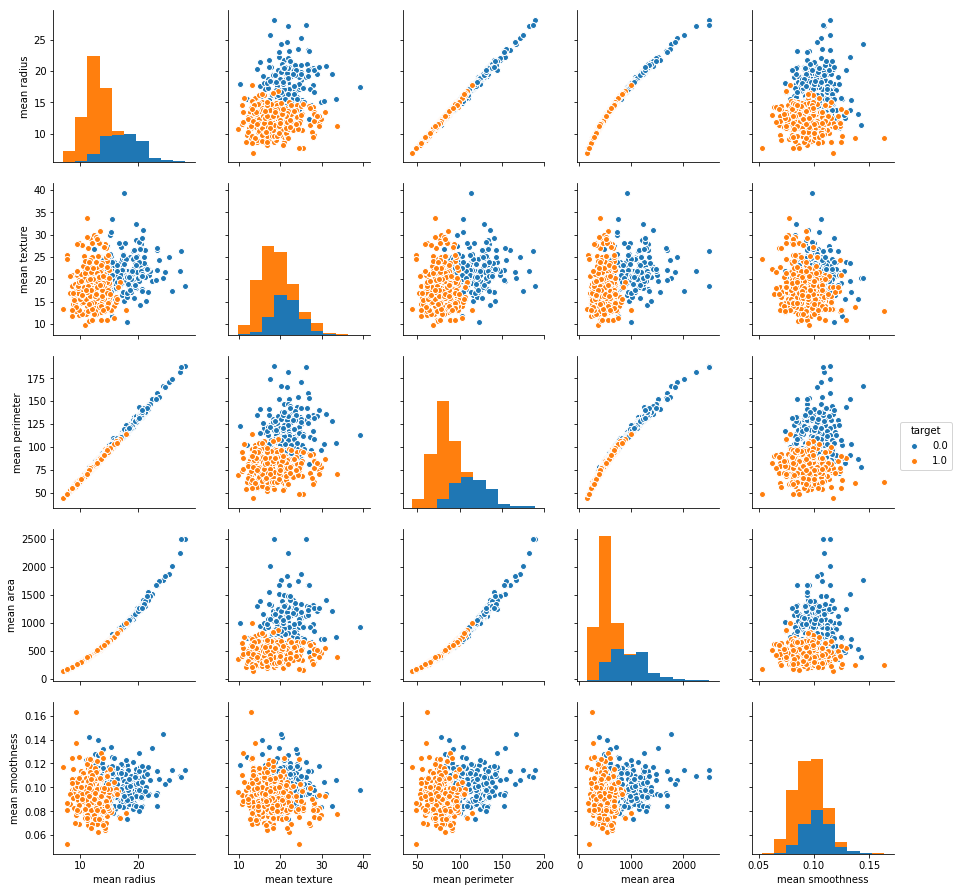

In [16]:
sns.pairplot(cdf,hue = 'target',vars = ['mean radius', 'mean texture', 'mean perimeter' ,'mean area',
 'mean smoothness'])

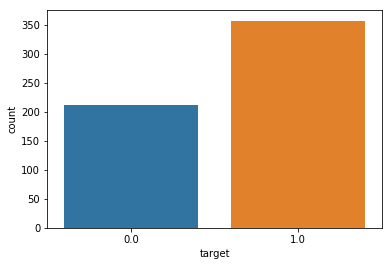

In [17]:
sns.countplot(cdf['target'],label = 'count')

In [18]:
#sns.scatterplot(x = 'mean area',y = 'mean smoothness',hue = 'target',data = cdf)
#sns.scatterplot(x = 'mean texture',y = 'mean radius',hue = 'target',data = cdf)


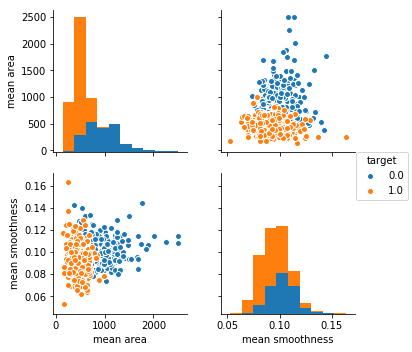

In [19]:
sns.pairplot(cdf,hue = 'target',vars = ['mean area','mean smoothness'])

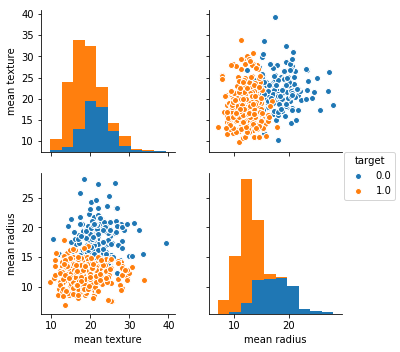

In [20]:
sns.pairplot(cdf,hue = 'target',vars = ['mean texture','mean radius'])

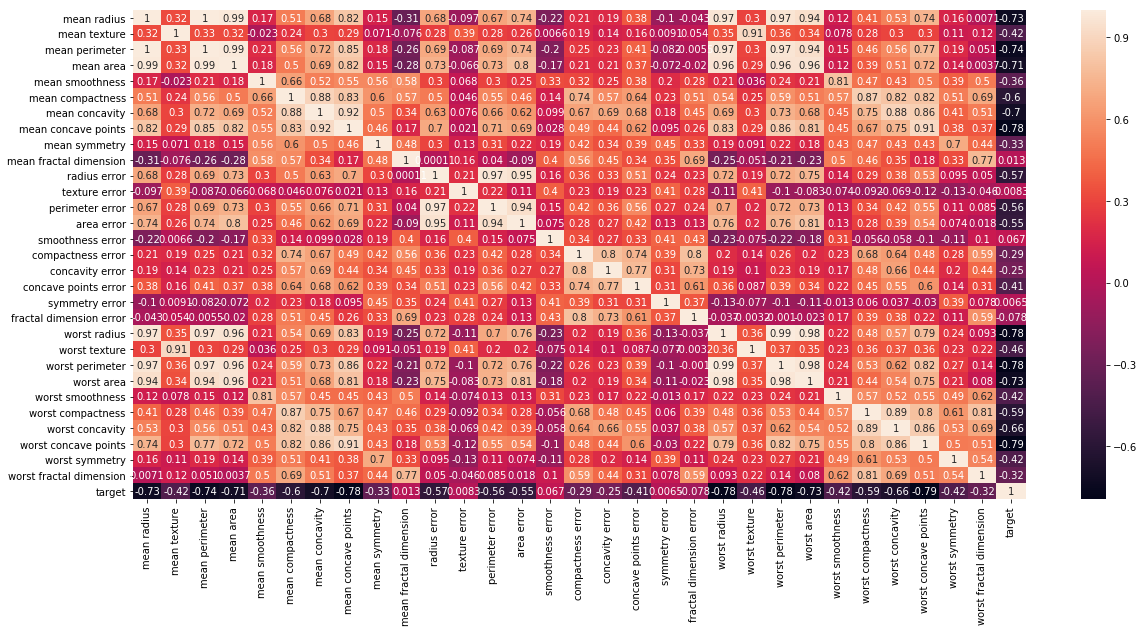

In [21]:
#plt.figure(figsize =(20,10))
#sns.set(font_scale=1.25)
#sns.heatmap(cdf.corr(),annot = True)
#plt.show()
import seaborn as sns
corr = cdf.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

# Step4:Model Training

In [22]:
X = cdf.drop(['target'],axis = 1)

In [23]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [24]:
y = cdf['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.25,random_state = 5)

In [26]:
X_train.shape

(426, 30)

In [27]:
X_test.shape

(143, 30)

In [28]:
Y_train.shape

(426,)

In [29]:
Y_test.shape

(143,)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
svc_model = SVC()

In [32]:
svc_model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Step5:Evaluating the model

In [33]:
y_prd = svc_model.predict(X_test)
y_prd

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

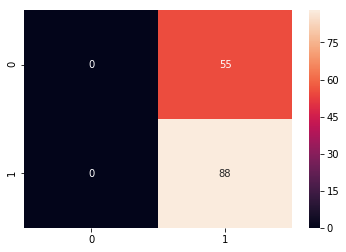

In [34]:
cm = confusion_matrix(Y_test,y_prd)
sns.heatmap(cm,annot = True, fmt = 'd')

In [35]:
print(classification_report(Y_test,y_prd))
#Result is not better in precision % so need to improve our model

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        55
        1.0       0.62      1.00      0.76        88

avg / total       0.38      0.62      0.47       143



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Step6: Improving The Model

In [36]:
#Normalizing/linearization the datasets
min_train = X_train.min()
min_train

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.114400
texture error                0.362100
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000968
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [37]:
range_train = (X_train - min_train).max()
range_train

mean radius                  20.239000
mean texture                 29.570000
mean perimeter              138.310000
mean area                  2106.500000
mean smoothness               0.110770
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.045790
radius error                  1.394600
texture error                 4.522900
perimeter error               9.293000
area error                  226.198000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028872
worst radius                 25.190000
worst texture                37.520000
worst perimeter             170.390000
worst area                 3246.800000
worst smoothness              0.129430
worst compactness        

In [38]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
373,0.674885,0.258370,0.658015,0.565630,0.377629,0.270597,0.357779,0.444384,0.258081,0.105263,...,0.692338,0.297175,0.683080,0.542319,0.656957,0.269921,0.376380,0.725773,0.267047,0.101732
289,0.216859,0.310450,0.205191,0.119867,0.311456,0.094166,0.056209,0.108002,0.481313,0.209434,...,0.175863,0.376333,0.169494,0.084422,0.313915,0.067711,0.068136,0.213162,0.404372,0.097731
208,0.302831,0.433886,0.312559,0.183195,0.429448,0.395436,0.203960,0.253579,0.398990,0.505351,...,0.262803,0.456823,0.287986,0.139861,0.492390,0.400607,0.286154,0.386942,0.608933,0.344746
504,0.113000,0.106865,0.127973,0.049941,1.000000,0.627323,0.227976,0.261034,0.665657,0.984058,...,0.093291,0.116205,0.109396,0.035419,0.919648,0.307371,0.189955,0.352234,0.349964,0.460186
499,0.672415,0.389922,0.679705,0.558509,0.504378,0.444819,0.512652,0.557157,0.397980,0.267744,...,0.632394,0.499467,0.661952,0.485031,0.581241,0.322506,0.468688,0.726117,0.217391,0.229240
427,0.188695,0.414948,0.180753,0.102730,0.319401,0.116711,0.084677,0.069781,0.482828,0.214239,...,0.191743,0.533582,0.195317,0.093723,0.456849,0.138070,0.174389,0.257216,0.332621,0.141545
179,0.288008,0.113290,0.271130,0.173416,0.313803,0.056316,0.021539,0.066103,0.205051,0.248307,...,0.226280,0.110075,0.212982,0.118732,0.347910,0.026351,0.024959,0.137113,0.051794,0.119048
288,0.211423,0.346635,0.216398,0.118965,0.248894,0.302804,0.217291,0.277734,0.775253,0.270146,...,0.156014,0.274787,0.163507,0.077738,0.244379,0.152332,0.139910,0.320069,0.330245,0.098714
43,0.311231,0.357457,0.314728,0.190695,0.464656,0.381020,0.230717,0.306064,0.461616,0.390041,...,0.375149,0.425906,0.367921,0.222373,0.632234,0.334827,0.331584,0.512715,0.516512,0.312607
195,0.292949,0.223876,0.280095,0.177023,0.241762,0.105147,0.090745,0.118141,0.388384,0.146539,...,0.236205,0.265991,0.237103,0.127941,0.297690,0.119636,0.159638,0.282990,0.346638,0.094779


In [39]:
#sns.scatterplot(x = X_train_scaled['mean area'],y = X_train_scaled['mean smoothness'],hue = y_train)

In [40]:
min_test = X_test.min()

In [41]:
range_test = (X_test - min_test).max()

In [42]:
X_test_scaled = (X_test - min_test)/range_test
X_test_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,0.355990,0.630143,0.363307,0.230073,0.553036,0.492624,0.462999,0.457449,0.518651,0.316844,...,0.414799,0.796791,0.472349,0.254533,0.565411,0.630446,0.505990,0.734398,0.476754,0.369512
163,0.207179,0.498051,0.196554,0.113447,0.461819,0.248425,0.147730,0.147517,0.249641,0.363966,...,0.166543,0.528409,0.151616,0.075720,0.425006,0.204029,0.134824,0.297315,0.124248,0.302081
123,0.315771,0.007362,0.303261,0.190153,0.577795,0.278502,0.243246,0.302039,0.468436,0.287420,...,0.245213,0.103944,0.231566,0.123795,0.321744,0.141853,0.204473,0.443033,0.248697,0.210701
361,0.255442,0.469900,0.236412,0.148970,0.261402,0.113184,0.091994,0.126712,0.439024,0.136887,...,0.189550,0.545789,0.180510,0.092753,0.193225,0.128174,0.096805,0.203701,0.198196,0.096221
549,0.130763,0.584236,0.115507,0.068652,0.210581,0.121384,0.042586,0.042656,0.554519,0.271642,...,0.146133,0.620989,0.133699,0.063883,0.240770,0.124330,0.049473,0.118433,0.282766,0.178429
339,0.768740,0.586834,0.753013,0.671760,0.536096,0.344386,0.634938,0.737062,0.426112,0.096375,...,0.800727,0.596925,0.747307,0.663353,0.471807,0.242465,0.384904,0.757983,0.189379,0.187941
286,0.187070,0.434820,0.181912,0.103217,0.264399,0.246992,0.180853,0.198170,0.276184,0.365032,...,0.153926,0.481952,0.176678,0.073997,0.175396,0.257727,0.188898,0.419086,0.163727,0.378429
354,0.146850,0.145084,0.132885,0.078664,0.090956,0.102120,0.123934,0.076895,0.349354,0.219403,...,0.112365,0.098596,0.111537,0.050872,0.004829,0.081711,0.095927,0.142308,0.185972,0.126794
421,0.325323,0.141187,0.332397,0.196857,0.486578,0.542395,0.398900,0.329326,0.633429,0.501493,...,0.273415,0.182821,0.290079,0.139703,0.321001,0.350652,0.257109,0.402032,0.236273,0.312781
124,0.258961,0.245561,0.242772,0.152192,0.070237,0.147272,0.222613,0.146367,0.157102,0.163966,...,0.191777,0.330214,0.175590,0.095475,0.107793,0.225847,0.264217,0.325762,0.080160,0.178599


In [43]:
svc_model = SVC()
svc_model.fit(X_train_scaled,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

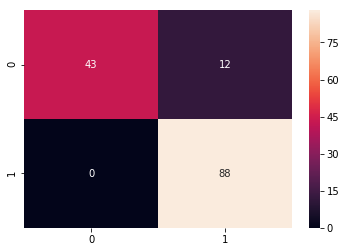

In [44]:
y_prd = svc_model.predict(X_test_scaled)
cm = confusion_matrix(Y_test,y_prd)
sns.heatmap(cm,annot = True, fmt = 'd')

In [45]:
print(classification_report(Y_test,y_prd))


             precision    recall  f1-score   support

        0.0       1.00      0.78      0.88        55
        1.0       0.88      1.00      0.94        88

avg / total       0.93      0.92      0.91       143



# Part2: Improving The Model

In [46]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],"kernel":['rbf']}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 4)

In [49]:
grid.fit(X_train_scaled,Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9440559440559441, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9432624113475178, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9020979020979021, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9084507042253521, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8581560283687943, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6312056737588653, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6293706293706294, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6338028169014085, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6312056737588653, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.986013986013986, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9647887323943662, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9645390070921985, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [53]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [54]:
grid_predict = grid.predict(X_test_scaled)

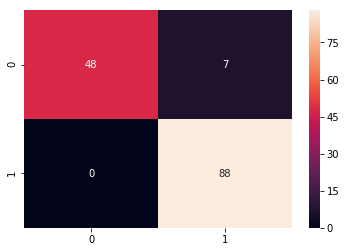

In [55]:
cm = confusion_matrix(Y_test,grid_predict)
sns.heatmap(cm,annot = True, fmt = 'd')

In [56]:
print(classification_report(Y_test,grid_predict))


             precision    recall  f1-score   support

        0.0       1.00      0.87      0.93        55
        1.0       0.93      1.00      0.96        88

avg / total       0.95      0.95      0.95       143

